### Walmart Sales Forecasting - Facebook Prophet

In [85]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


#### Data Preprocessing

In [86]:
# importing the dataset

df_comp = pd.read_csv('Walmart.csv')
df_comp.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [87]:
df = df_comp.copy()
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [88]:
df = df[['Date','Weekly_Sales']]
df.head()

,Date,Weekly_Sales
0,05-02-2010,1643690.90
1,12-02-2010,1641957.44
2,19-02-2010,1611968.17
3,26-02-2010,1409727.59
4,05-03-2010,1554806.68


In [89]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst = True)
df = df.drop_duplicates(subset='Date', keep='first')
df.head()

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


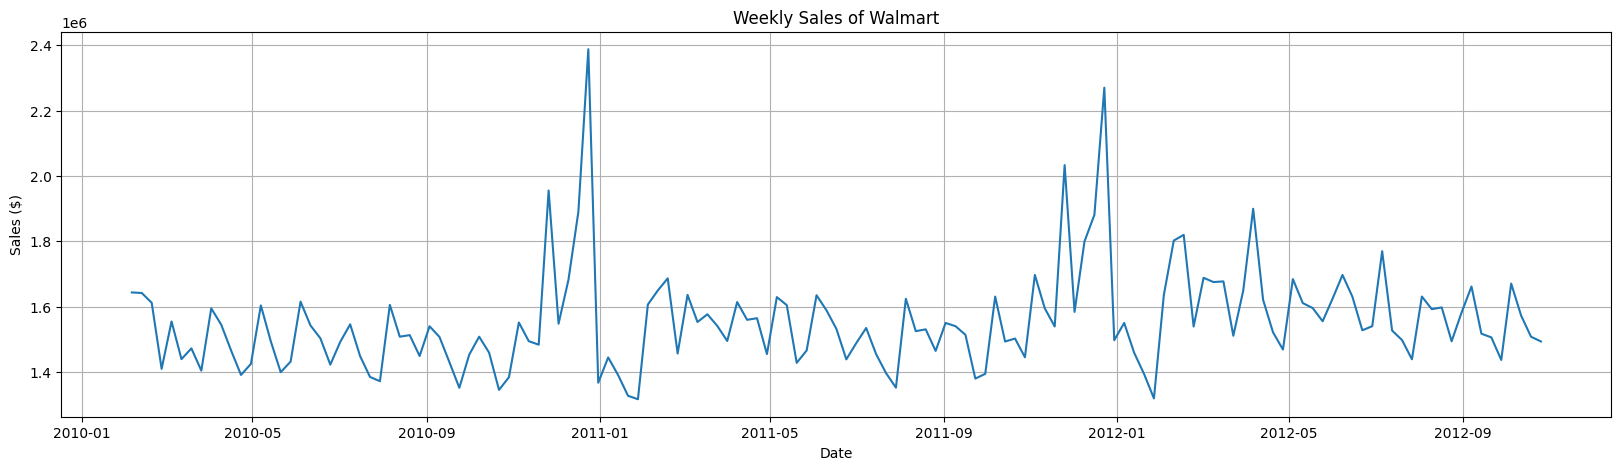

In [90]:
# plotting Weekly sales

plt.figure(figsize=(20,5))
plt.plot(df['Date'],df['Weekly_Sales'], label = 'Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.title('Weekly Sales of Walmart')
plt.grid()
plt.show()

In [91]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


In [92]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic'

In [93]:
# initiating the model

model = Prophet()

In [94]:
model.fit(df)

22:04:37 - cmdstanpy - INFO - Chain [1] start processing
22:04:37 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
# create future dates for next 84 days

future_dates =  model.make_future_dataframe(periods=84)
prediction = model.predict(future_dates)


In [96]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,1.483590e+06,1.447068e+06,1.724405e+06,1.483590e+06,1.483590e+06,92034.937746,92034.937746,92034.937746,92034.937746,92034.937746,92034.937746,0.0,0.0,0.0,1.575625e+06
1,2010-02-12,1.484653e+06,1.496958e+06,1.776124e+06,1.484653e+06,1.484653e+06,145656.847794,145656.847794,145656.847794,145656.847794,145656.847794,145656.847794,0.0,0.0,0.0,1.630310e+06
2,2010-02-19,1.485716e+06,1.452174e+06,1.724033e+06,1.485716e+06,1.485716e+06,102501.631962,102501.631962,102501.631962,102501.631962,102501.631962,102501.631962,0.0,0.0,0.0,1.588217e+06
3,2010-02-26,1.486778e+06,1.388007e+06,1.657402e+06,1.486778e+06,1.486778e+06,35794.483410,35794.483410,35794.483410,35794.483410,35794.483410,35794.483410,0.0,0.0,0.0,1.522573e+06
4,2010-03-05,1.487841e+06,1.347703e+06,1.620240e+06,1.487841e+06,1.487841e+06,650.436524,650.436524,650.436524,650.436524,650.436524,650.436524,0.0,0.0,0.0,1.488491e+06


In [97]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [98]:
future_dates.tail()

,ds
222,2013-01-14
223,2013-01-15
224,2013-01-16
225,2013-01-17
226,2013-01-18


<Figure size 2000x500 with 0 Axes>

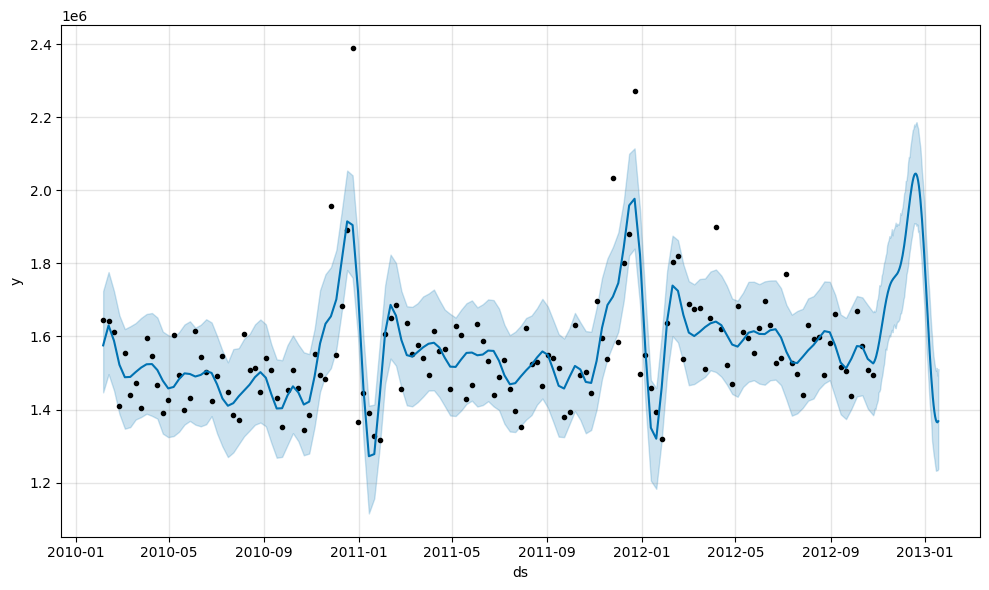

In [99]:
# plot the prediction

plt.figure(figsize=(20,5))
model.plot(prediction)
plt.show()

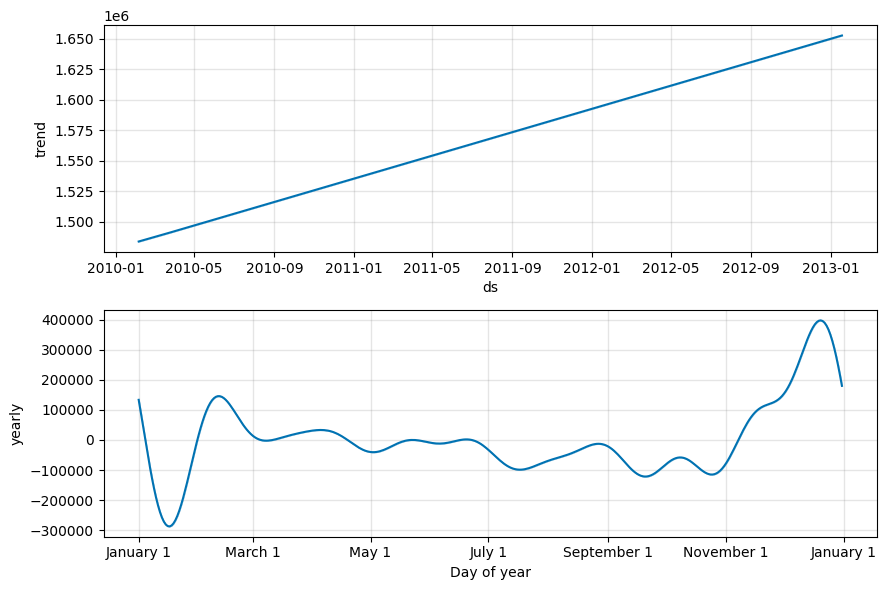

In [100]:
# visualize each components [Trends,Weekly]

model.plot_components(prediction)
plt.show()

In [101]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial = '168 days', period ='42 days',horizon = '84 days')
df_cv.head()

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/18 [00:00<?, ?it/s]22:04:39 - cmdstanpy - INFO - Chain [1] start processing
22:04:39 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 1/18 [00:00<00:08,  2.11it/s]22:04:39 - cmdstanpy - INFO - Chain [1] start processing
22:04:39 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 2/18 [00:00<00:06,  2.41it/s]22:04:40 - cmdstanpy - INFO - Chain [1] start processing
22:04:40 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 3/18 [00:01<00:05,  2.59it/s]22:04:40 - cmdstanpy - INFO - Chain [1] start processing
22:04:40 - cmdstanpy - INFO - Chain [1] done processing
 22%|██▏       | 4/18 [00:01<00:05,  2.69it/s]22:04:40 - cmdstanpy - INFO - Chain [1] start processing
22:04:40 - cmdstanpy - INFO - Chain [1] done processing
 28%|██▊       | 5/18 [00:01<00:04,  2.77it/s]22:04:41 - cmdstanpy - INFO - Chain [1] start processing
22:04:

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-08-27,3.205896e+06,3.161005e+06,3.248634e+06,1449142.92,2010-08-20
1,2010-09-03,7.920288e+06,7.876037e+06,7.965903e+06,1540163.53,2010-08-20
2,2010-09-10,1.382950e+07,1.378207e+07,1.387374e+07,1507460.69,2010-08-20
3,2010-09-17,1.528469e+07,1.523988e+07,1.532958e+07,1430378.67,2010-08-20
4,2010-09-24,6.972109e+06,6.928010e+06,7.018112e+06,1351791.03,2010-08-20


In [102]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,14 days,8.035479e+12,2.834692e+06,1.259330e+06,0.770225,0.056629,0.378874,0.658730
1,21 days,4.383095e+13,6.620495e+06,2.804661e+06,1.903589,0.060085,0.409459,0.714286
2,28 days,1.376794e+14,1.173369e+07,4.717627e+06,3.152678,0.059236,0.417964,0.674603
3,35 days,2.735221e+14,1.653850e+07,6.102859e+06,3.724318,0.079811,0.415709,0.666667
4,42 days,3.637914e+14,1.907332e+07,7.115818e+06,4.051773,0.076227,0.427421,0.666667
5,49 days,3.116242e+14,1.765288e+07,7.118292e+06,4.789161,0.070542,0.432461,0.666667
6,56 days,1.576470e+14,1.255576e+07,5.159523e+06,3.364060,0.060160,0.426999,0.714286
7,63 days,5.461906e+13,7.390471e+06,3.030893e+06,2.077721,0.060923,0.420083,0.674603
8,70 days,9.271123e+13,9.628667e+06,3.588480e+06,2.337006,0.056332,0.399236,0.714286
9,77 days,1.408322e+14,1.186727e+07,4.253722e+06,2.515516,0.066661,0.416244,0.674603


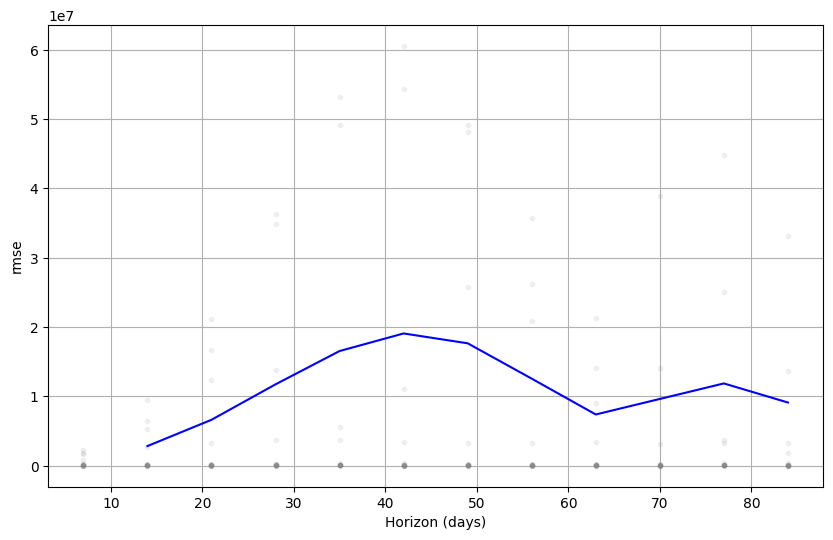

In [103]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv,metric = 'rmse')